# EDA of time-series data for bike share

In [26]:
import pandas as pd
data=pd.read_csv("dc_bike_share_train.csv", parse_dates=["datetime"])
data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


It is a timeseries data with hourly information from 1st Jan, 2011 to 19th Dec, 2012

In [2]:
# Check dataframe dimension
data.shape

(10886, 12)

There are 10885 datapoints (+1 for header) and 12 columns/features

In [4]:
#Check null values and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


There are no null values, data is clean. The 12 columns are int/float type with one datetime type

In [27]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
data["season"].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

There are 4 seasons during the time period of the data

In [6]:
data["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

During the time period of the data, there are less holidays

In [7]:
data["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

There are more workingdays as compared to offs

In [8]:
data["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

## Feature engineering:

Extract months, days, hours from the datetime series using pandas. This will add more sense to analyze the data

In [28]:
# Extract months, days, hours as new features
data["months"]=pd.DatetimeIndex(data["datetime"]).month
data["day"]=pd.DatetimeIndex(data["datetime"]).day
data["hour"]=pd.DatetimeIndex(data["datetime"]).hour
data["weekday"]=pd.DatetimeIndex(data["datetime"]).weekday
data=data.set_index("datetime")
data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,months,day,hour,weekday
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,0,5
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1,5
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,2,5
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,3,5
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,19,19,2
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,19,20,2
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,19,21,2


It would be important to analyze the following:
    
    1. Seasonality in various time points (hourly/daily/monthly)
    2. Stationarity in various time points (hourly/daily/monthly)
    

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

## Monthly seasonality in weather conditions and count of bike rides
First group the data by month, and display distribution for each month to visualize yearly seasonality

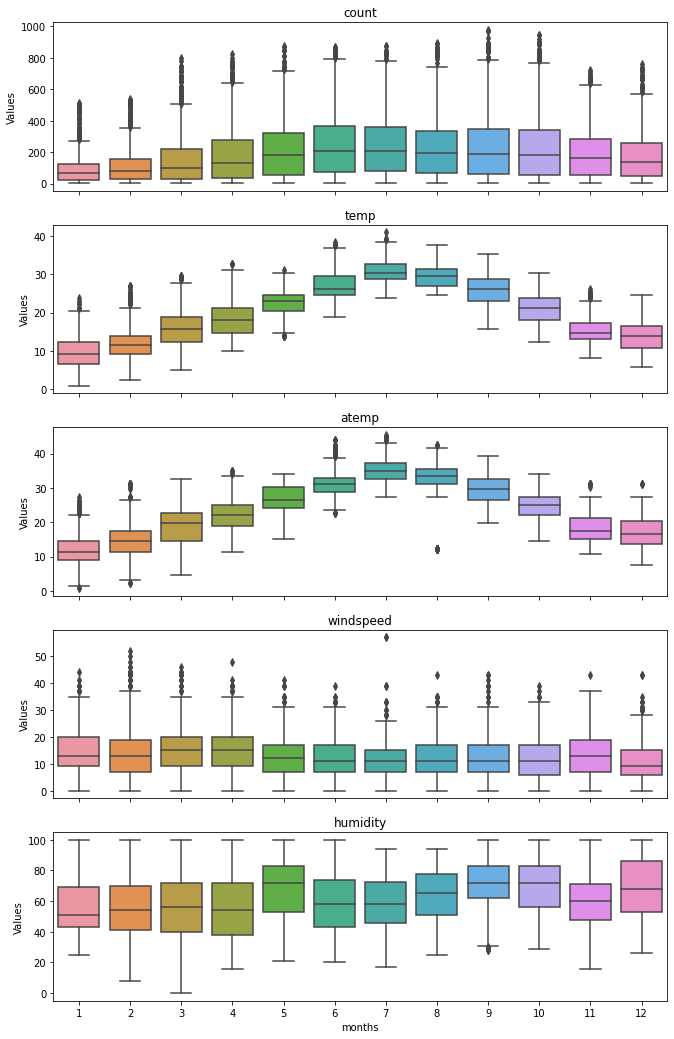

In [36]:
# cols_plot = ["count", "temp", "atemp"]
fig, axes = plt.subplots(5, 1, figsize=(11, 18), sharex=True)
for name, ax in zip(["count", "temp", "atemp", "windspeed", "humidity"], axes):
    sns.boxplot(data=data, x='months', y=name, ax=ax)
    ax.set_ylabel('Values')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

Count of rides gradually increases during summer months, i.e. from May to June and July and gradually decreases. However there is slight decrease up until October.
This trend is evident in the temperature/average temperature. While July is the hottest month, the count of bikes is almost equal during June and July.
January has the least rides,followed by February. Its upper quartile is lower than February and December. This can be attributed to extreme temperature and holiday season.
The median windspeed is almost constant during June to October, this could impact bike riding. May, September, October and December have the highest humidity.
